In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17464789/17464789 [==============================] - 4s 0us/step


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [6]:
# LSTM layers
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-lstm-model.h5", save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 30ms/step - loss: 0.6925 - accuracy: 0.5319 - val_loss: 0.6913 - val_accuracy: 0.5828
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6891 - accuracy: 0.6065 - val_loss: 0.6865 - val_accuracy: 0.6262
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6778 - accuracy: 0.6612 - val_loss: 0.6645 - val_accuracy: 0.6820
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6305 - accuracy: 0.7009 - val_loss: 0.6052 - val_accuracy: 0.6964
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5899 - accuracy: 0.7122 - val_loss: 0.5765 - val_accuracy: 0.7270
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5635 - accuracy: 0.7370 - val_loss: 0.5561 - val_accuracy: 0.7456
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5427 - accuracy: 0.7528 - val_loss: 0.5394 - val_accuracy

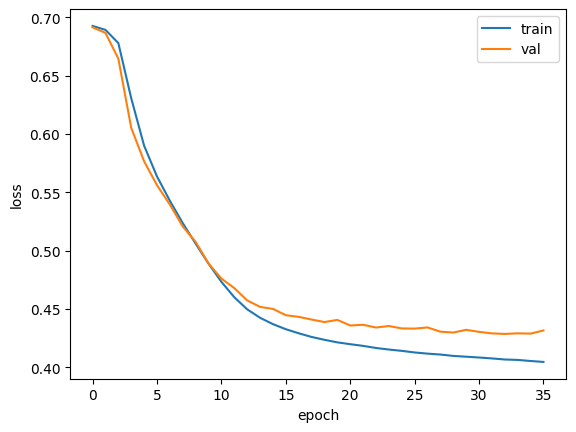

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

In [15]:
# Add dropout in the recurring layers
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))     # <---------- HERE
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-dropout-model.h5", save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = 3)

hihstory = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                        validation_data = (val_seq, val_target),
                        callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6928 - accuracy: 0.5170 - val_loss: 0.6922 - val_accuracy: 0.5342
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6914 - accuracy: 0.5534 - val_loss: 0.6905 - val_accuracy: 0.5824
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6889 - accuracy: 0.5937 - val_loss: 0.6869 - val_accuracy: 0.6170
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6827 - accuracy: 0.6309 - val_loss: 0.6767 - val_accuracy: 0.6598
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6537 - accuracy: 0.6850 - val_loss: 0.6158 - val_accuracy: 0.7002
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5969 - accuracy: 0.7025 - val_loss: 0.5813 - val_accuracy: 0.7174
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5695 - accuracy: 0.7261 - val_loss: 0.5579 - val_accuracy

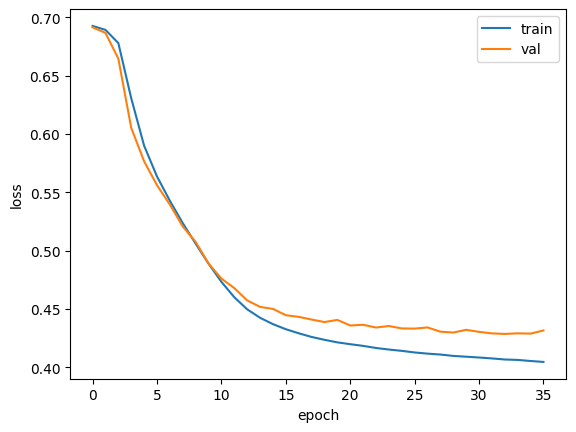

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Connect the two layers at LSTM

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))    # Pass the result to the next LSTM cell
model3.add(keras.layers.LSTM(8, dropout = 0.3))                             # THe last LSTM cell. print the result.
model3.add(keras.layers.Dense(1, activation  ="sigmoid"))

In [21]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2rnn-model.h5", save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 36ms/step - loss: 0.6931 - accuracy: 0.5041 - val_loss: 0.6930 - val_accuracy: 0.5106
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6928 - accuracy: 0.5192 - val_loss: 0.6926 - val_accuracy: 0.5154
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6921 - accuracy: 0.5623 - val_loss: 0.6915 - val_accuracy: 0.5766
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6903 - accuracy: 0.5889 - val_loss: 0.6884 - val_accuracy: 0.6272
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6837 - accuracy: 0.6323 - val_loss: 0.6759 - val_accuracy: 0.6626
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6501 - accuracy: 0.6766 - val_loss: 0.6174 - val_accuracy: 0.7086
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5959 - accuracy: 0.7131 - val_loss: 0.5797 - val_accuracy

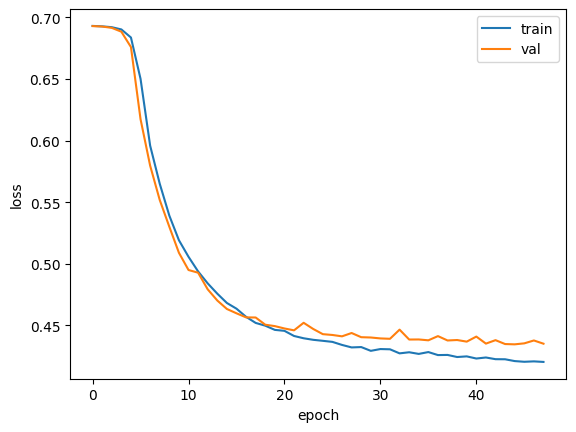

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

In [27]:
# GRU!
# Simplified version of LSTM, but it's also powerful tho!
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = "sigmoid"))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-gru-model.h5", save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6930 - accuracy: 0.5066 - val_loss: 0.6918 - val_accuracy: 0.5464
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6909 - accuracy: 0.5578 - val_loss: 0.6898 - val_accuracy: 0.5882
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6882 - accuracy: 0.5867 - val_loss: 0.6868 - val_accuracy: 0.5980
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6842 - accuracy: 0.6013 - val_loss: 0.6825 - val_accuracy: 0.6004
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6783 - accuracy: 0.6118 - val_loss: 0.6760 - val_accuracy: 0.6062
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6697 - accuracy: 0.6213 - val_loss: 0.6668 - val_accuracy: 0.6140
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6579 - accuracy: 0.6331 - val_loss: 0.6548 - val_accuracy

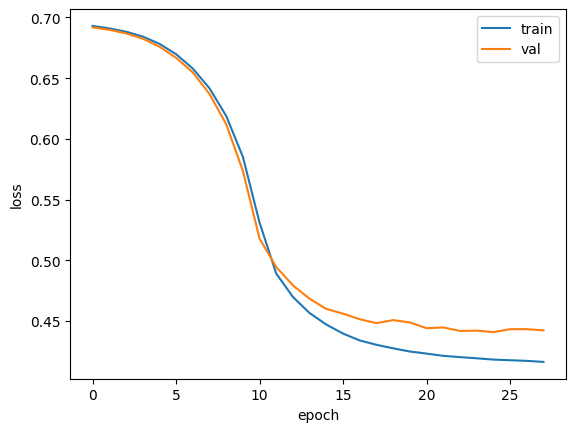

In [30]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()